# 공모전 개요

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

[ 필수 데이터 ]
-	국가승인통계 : 국민문화예술활동조사, 국민여가활동조사, 근로자휴가조사, 주요관광지점 입장객통계, 국민여행조사, 외래관광객조사
-	민간 데이터 : 신한카드 데이터

[ 활용 데이터 ]
-	공공 데이터 : 국토교통부 교통 관련 빅 데이터, 기상청 국가기후데이터, 행정안전부 빅데이터 등
-	기타 : SNS 키워드 분석 등

http://stat.mcst.go.kr/mcst/WebPortal/public/visual/snsBigdata.html

In [2]:
import pandas as pd
foreigner = pd.read_csv('./data/FOREIGNER.txt', sep = "|", engine='python', encoding = "utf-8")
foreigner

,nt,v2,v3,gb3,gb2,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,v1
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55,NaN
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261,NaN
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120,NaN
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9,NaN
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3264529,홍콩,해운대구,NaN,숙박,특급호텔,202010,WHITE,기타,14755654,24,부산
3264530,오스트레일리아,해운대구,NaN,숙박,특급호텔,202010,WHITE,기타,3745645,10,부산
3264531,인도네시아,해운대구,NaN,숙박,특급호텔,202008,WHITE,기타,258200,2,부산
3264532,프랑스,해운대구,NaN,숙박,특급호텔,202102,RED,기타,176000,1,부산


In [3]:
foreigner.isna().sum()

nt                      0
v2                      0
v3                 534395
gb3                     0
gb2                     0
ta_ym                   0
daw_ccd_r               0
apv_ts_dl_tm_r          0
vlm                     0
usec                    0
v1                2730139
dtype: int64

In [4]:
foreigner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264534 entries, 0 to 3264533
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   nt              object
 1   v2              object
 2   v3              object
 3   gb3             object
 4   gb2             object
 5   ta_ym           int64 
 6   daw_ccd_r       object
 7   apv_ts_dl_tm_r  object
 8   vlm             int64 
 9   usec            int64 
 10  v1              object
dtypes: int64(3), object(8)
memory usage: 274.0+ MB


In [5]:
foreigner.columns = ['국적', '가맹점 주소(시도)', '가맹점 주소(시군구)', '업종 대분류', '업종 소분류', '이용년월', '요일', '이용시간대',
       '취급액', '이용건수', '거주지']

foreigner['년'] = foreigner['이용년월'].astype(str).str[:4]
foreigner['월'] = foreigner['이용년월'].astype(str).str[4:]

In [6]:
foreigner['이용년월'].unique().sort

<function ndarray.sort>

In [7]:
foreigner

,국적,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,이용년월,요일,이용시간대,취급액,이용건수,거주지,년,월
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55,NaN,2017,03
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261,NaN,2018,05
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120,NaN,2018,07
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9,NaN,2017,05
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449,NaN,2018,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264529,홍콩,해운대구,NaN,숙박,특급호텔,202010,WHITE,기타,14755654,24,부산,2020,10
3264530,오스트레일리아,해운대구,NaN,숙박,특급호텔,202010,WHITE,기타,3745645,10,부산,2020,10
3264531,인도네시아,해운대구,NaN,숙박,특급호텔,202008,WHITE,기타,258200,2,부산,2020,08
3264532,프랑스,해운대구,NaN,숙박,특급호텔,202102,RED,기타,176000,1,부산,2021,02


1. 장기거주 외국인
2. 단기 여행객

In [8]:
tem = foreigner[foreigner['거주지'].isnull()]
tem

,국적,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,이용년월,요일,이용시간대,취급액,이용건수,거주지,년,월
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55,NaN,2017,03
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261,NaN,2018,05
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120,NaN,2018,07
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9,NaN,2017,05
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449,NaN,2018,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730134,오스트레일리아,부산,사상구,쇼핑,기타쇼핑,202006,RED,기타,15000,1,NaN,2020,06
2730135,미국,대전,동구,음식,유흥,202005,RED,기타,160000,1,NaN,2020,05
2730136,중국,부산,부산진구,음식,유흥,202006,WHITE,기타,202171,2,NaN,2020,06
2730137,일본,경기,파주시,의료,치과병원,202001,WHITE,기타,11900,1,NaN,2020,01


In [9]:
del tem['거주지']

In [10]:
liv = foreigner[~foreigner['거주지'].isnull()]

In [11]:
# 가맹점 주소가 없는 사람
who = liv[liv['거주지']=='*']
who['가맹점 주소(시도)'].unique()

array(['*'], dtype=object)

In [12]:
# 사는 사람이 거주지랑 다른 곳을 간 경우
liv_tra = liv[~(liv['가맹점 주소(시도)']==liv['거주지'])]
liv_tra['가맹점 주소(시군구)'].unique()

array([nan], dtype=object)

In [13]:
liv_tra['업종 소분류'].unique()

array(['기타지출', '오락시설', '스포츠센타/레포츠클럽', '기타', '공연장,극장', '종합병원', '할인점/편의점',
       '치과병원', '응급실운영  병원', '한의원,한약방', '1급2급호텔', '의료기기,건강진단', '이용,미용',
       '개인병원', '백화점', '약국', '피부미용', '자전거(성인용)', '기타쇼핑', '특급호텔', '유흥',
       '그외숙박', '목욕시설', '한식외', '의류잡화', '레저스포츠', '관광여행사', '화장품', '음료제과',
       '실내골프장', '테니스장', '볼링장', '한식', '가전전자제품', '관광상품', '보트판매', '실외골프장',
       '쇼핑몰', '수련원,체험장', '면세점', '수족관', '동물농장', '산후조리원', '보건소', '수중장비',
       '운동경기관람', '당구장', '종합레저타운/놀이동산', '수영장', '접골원', '스키장'], dtype=object)

In [14]:
del liv_tra['가맹점 주소(시군구)']

In [15]:
liv_tra.loc[:,['가맹점 주소(시도)', '거주지']]

,가맹점 주소(시도),거주지
2730147,남구,부산
2730148,남구,부산
2730149,남구,울산
2730150,남구,울산
2730151,남구,울산
...,...,...
3264529,해운대구,부산
3264530,해운대구,부산
3264531,해운대구,부산
3264532,해운대구,부산


In [16]:
liv_tra['거주지'].unique()

array(['부산', '울산', '대구', '광주', '인천', '대전', '서울', '경기', '강원', '전남', '경남',
       '경북', '충남', '전북', '충북', '제주'], dtype=object)

In [17]:
liv_tra['가맹점 주소(시도)'].unique()

array(['남구', '동구', '북구', '서구', '중구', '가평군', '강남구', '강동구', '강릉시', '강북구',
       '강서구', '강진군', '강화군', '거제시', '거창군', '경산시', '경주시', '계룡시', '계양구',
       '고령군', '고성군', '고양시', '고창군', '고흥군', '곡성군', '공주시', '과천시', '관악구',
       '광명시', '광산구', '광양시', '광주시', '광진구', '괴산군', '구례군', '구로구', '구리시',
       '구미시', '군산시', '군위군', '군포시', '금산군', '금정구', '금천구', '기장군', '김제시',
       '김천시', '김포시', '김해시', '나주시', '남동구', '남원시', '남해군', '노원구', '논산시',
       '단양군', '달서구', '달성군', '담양군', '당진시', '대덕구', '도봉구', '동래구', '동작구',
       '동해시', '마포구', '목포시', '무안군', '무주군', '문경시', '밀양시', '보령시', '보성군',
       '보은군', '봉화군', '부안군', '부여군', '부천시', '부평구', '사상구', '사천시', '사하구',
       '산청군', '삼척시', '상주시', '서산시', '서천군', '서초구', '성남시', '성동구', '성북구',
       '성주군', '속초시', '송파구', '수성구', '수영구', '수원시', '순창군', '순천시', '시흥시',
       '신안군', '아산시', '안동시', '안산시', '안성시', '안양시', '양구군', '양산시', '양양군',
       '양주시', '양천구', '양평군', '여수시', '여주시', '연수구', '연제구', '연천군', '영광군',
       '영덕군', '영도구', '영동군', '영암군', '영양군', '영월군', '영주시', '영천시', '예산군',
       '예천군', '오산시

In [18]:
liv_tra.loc[liv_tra['거주지']=='부산',:]

,국적,가맹점 주소(시도),업종 대분류,업종 소분류,이용년월,요일,이용시간대,취급액,이용건수,거주지,년,월
2730147,말레이지아,남구,쇼핑,기타지출,202101,RED,기타,6800000,1,부산,2021,01
2730148,미국,남구,쇼핑,기타지출,202105,WHITE,기타,6738418,46,부산,2021,05
2730157,중국,남구,교통,기타,202102,WHITE,기타,56800,3,부산,2021,02
2730159,일본,남구,교통,기타,202102,WHITE,기타,53900,6,부산,2021,02
2730160,러시아,남구,교통,기타,202009,WHITE,기타,128771,4,부산,2020,09
...,...,...,...,...,...,...,...,...,...,...,...,...
3264529,홍콩,해운대구,숙박,특급호텔,202010,WHITE,기타,14755654,24,부산,2020,10
3264530,오스트레일리아,해운대구,숙박,특급호텔,202010,WHITE,기타,3745645,10,부산,2020,10
3264531,인도네시아,해운대구,숙박,특급호텔,202008,WHITE,기타,258200,2,부산,2020,08
3264532,프랑스,해운대구,숙박,특급호텔,202102,RED,기타,176000,1,부산,2021,02


In [19]:
liv_tra = liv_tra.rename(columns = {'가맹점 주소(시도)':'가맹점 주소(시군구)', '거주지' : '가맹점 주소(시도)'})

In [20]:
print(liv_tra.shape, tem.shape, who.shape, foreigner.shape)

(531746, 12) (2730139, 12) (211, 13) (3264534, 13)


In [21]:
531746+2730139

3261885

In [22]:
liv_tra.columns

Index(['국적', '가맹점 주소(시군구)', '업종 대분류', '업종 소분류', '이용년월', '요일', '이용시간대', '취급액',
       '이용건수', '가맹점 주소(시도)', '년', '월'],
      dtype='object')

In [23]:
tem.columns

Index(['국적', '가맹점 주소(시도)', '가맹점 주소(시군구)', '업종 대분류', '업종 소분류', '이용년월', '요일',
       '이용시간대', '취급액', '이용건수', '년', '월'],
      dtype='object')

In [24]:
liv_tra = liv_tra.reindex(columns=['국적', '가맹점 주소(시도)', '가맹점 주소(시군구)', '업종 대분류', '업종 소분류', '이용년월', '요일',
       '이용시간대', '취급액', '이용건수', '년', '월'])

In [25]:
liv_tra[liv_tra['가맹점 주소(시군구)']=='*']

,국적,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,이용년월,요일,이용시간대,취급액,이용건수,년,월


In [26]:
foreigner = pd.concat([tem, liv_tra], axis=0)

In [27]:
foreigner.to_csv('./data/foreigner_clean.csv')

In [28]:
foreigner[foreigner['가맹점 주소(시도)']=='세종']

,국적,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,이용년월,요일,이용시간대,취급액,이용건수,년,월
410,미국,세종,세종,스포츠,스포츠센타/레포츠클럽,201908,WHITE,기타,164000,2,2019,08
735,중국,세종,세종,쇼핑,기타지출,201905,RED,기타,298952,2,2019,05
873,미국,세종,세종,스포츠,스포츠센타/레포츠클럽,201806,WHITE,기타,388000,4,2018,06
1628,미국,세종,세종,체험,피부미용,202006,WHITE,기타,50000,1,2020,06
2724,영국,세종,세종,교통,기타,201811,RED,기타,19400,3,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2728028,미국,세종,세종,의료,치과병원,201703,RED,기타,21700,1,2017,03
2728287,캐나다,세종,세종,음식,유흥,201710,WHITE,기타,10000,1,2017,10
2729197,베트남,세종,세종,숙박,그외숙박,201810,RED,기타,40000,1,2018,10
2729554,미국,세종,세종,숙박,그외숙박,201809,RED,기타,40000,1,2018,09


In [29]:
foreigner['가맹점 주소(시군구)'].unique()

array(['용산구', '오산시', '서초구', '제주시', '평택시', '영등포구', '중구', '강남구', '강서구',
       '경산시', '군산시', '안산시', '종로구', '관악구', '거제시', '하남시', '유성구', '마포구',
       '연제구', '송파구', '성남시', '구로구', '성동구', '해운대구', '전주시', '부평구', '경주시',
       '서구', '제천시', '진주시', '중랑구', '용인시', '천안시', '통영시', '북구', '성북구', '남동구',
       '당진시', '금산군', '동구', '은평구', '계양구', '김포시', '서대문구', '부산진구', '칠곡군',
       '화성시', '창원시', '노원구', '금천구', '고양시', '수원시', '동작구', '남구', '연수구',
       '산청군', '수성구', '동래구', '안양시', '양산시', '시흥시', '부천시', '음성군', '아산시',
       '서귀포시', '달서구', '의왕시', '의정부시', '세종', '금정구', '진안군', '남양주시', '수영구',
       '목포시', '김해시', '예산군', '포항시', '강릉시', '충주시', '강동구', '동대문구', '여수시',
       '광진구', '양천구', '미추홀구', '인제군', '광주시', '하동군', '군포시', '동해시', '사천시',
       '구미시', '강북구', '도봉구', '안성시', '홍성군', '이천시', '횡성군', '달성군', '증평군',
       '원주시', '사상구', '사하구', '광산구', '과천시', '춘천시', '구리시', '영도구', '동두천시',
       '평창군', '속초시', '여주시', '김천시', '순천시', '계룡시', '봉화군', '익산시', '파주시',
       '광명시', '김제시', '철원군', '영천시', '포천시', '홍천군', '양주시', '가평군', '서산시',
       '보

In [30]:
foreigner.loc[foreigner['가맹점 주소(시군구)'].isnull(),'가맹점 주소(시군구)'] = '*'

foreigner['가맹점 주소'] = foreigner['가맹점 주소(시도)']+ " " + foreigner['가맹점 주소(시군구)']

In [31]:
foreigner['가맹점 주소']. unique()

array(['서울 용산구', '경기 오산시', '서울 서초구', '제주 제주시', '경기 평택시', '서울 영등포구',
       '인천 중구', '서울 강남구', '서울 강서구', '경북 경산시', '전북 군산시', '경기 안산시',
       '서울 종로구', '서울 관악구', '경남 거제시', '경기 하남시', '대전 유성구', '서울 마포구',
       '부산 연제구', '서울 송파구', '경기 성남시', '서울 구로구', '서울 성동구', '부산 해운대구',
       '전북 전주시', '인천 부평구', '서울 중구', '경북 경주시', '대전 서구', '부산 중구', '충북 제천시',
       '경남 진주시', '서울 중랑구', '경기 용인시', '충남 천안시', '경남 통영시', '광주 북구',
       '서울 성북구', '부산 강서구', '대구 중구', '인천 남동구', '충남 당진시', '충남 금산군', '울산 중구',
       '대구 동구', '서울 은평구', '인천 계양구', '경기 김포시', '서울 서대문구', '부산 부산진구',
       '경북 칠곡군', '경기 화성시', '경남 창원시', '서울 노원구', '부산 동구', '서울 금천구',
       '경기 고양시', '경기 수원시', '광주 서구', '서울 동작구', '부산 남구', '인천 연수구', '경남 산청군',
       '대구 수성구', '부산 동래구', '대전 동구', '경기 안양시', '경남 양산시', '경기 시흥시',
       '경기 부천시', '충북 음성군', '충남 아산시', '제주 서귀포시', '인천 서구', '인천 동구',
       '대구 달서구', '경기 의왕시', '경기 의정부시', '세종 세종', '부산 금정구', '전북 진안군',
       '경기 남양주시', '부산 수영구', '전남 목포시', '경남 김해시', '충남 예산군', '경북 포항시',
       '강원 강릉시', '울산 남구', '충북 충주시', '서울 

In [32]:
who = foreigner[foreigner['가맹점 주소(시군구)']=='*']
idx = foreigner[foreigner['가맹점 주소(시군구)']=='*'].index
foreigner = foreigner.drop(idx)

In [33]:
tra = foreigner[foreigner['업종 대분류']!='의료']

In [34]:
# 관광 관련 값 고르기
['기타지출', '스포츠센타/레포츠클럽',
       '할인점/편의점', '기타쇼핑','약국', '한식외', '관광여행사', '의류잡화', '레저스포츠', '화장품',
       '테니스장', '수중장비', '그외숙박', '보트판매', '유흥', '관광상품', '수영장', '종합레저타운/놀이동산',
       '음료제과', '수련원,체험장', '스키장', '가전전자제품', '실외골프장', '1급2급호텔', '실내골프장',
       '보건소', '동물농장', '특급호텔', '이용,미용', '수족관', '볼링장', '목욕시설',
       '공연장,극장', '쇼핑몰', '오락시설', '면세점','백화점', '한식',
       '운동경기관람', '당구장', '자전거(성인용)']

['기타지출',
 '스포츠센타/레포츠클럽',
 '할인점/편의점',
 '기타쇼핑',
 '약국',
 '한식외',
 '관광여행사',
 '의류잡화',
 '레저스포츠',
 '화장품',
 '테니스장',
 '수중장비',
 '그외숙박',
 '보트판매',
 '유흥',
 '관광상품',
 '수영장',
 '종합레저타운/놀이동산',
 '음료제과',
 '수련원,체험장',
 '스키장',
 '가전전자제품',
 '실외골프장',
 '1급2급호텔',
 '실내골프장',
 '보건소',
 '동물농장',
 '특급호텔',
 '이용,미용',
 '수족관',
 '볼링장',
 '목욕시설',
 '공연장,극장',
 '쇼핑몰',
 '오락시설',
 '면세점',
 '백화점',
 '한식',
 '운동경기관람',
 '당구장',
 '자전거(성인용)']

In [35]:
foreigner.to_csv('./data/foreigner_nonull.csv')

In [36]:
df = pd.read_csv('./data/foreigner_nonull.csv')

In [37]:
trans = df[df['업종 대분류']=='교통']
trans = trans.drop(['Unnamed: 0','업종 대분류'], axis=1)

In [38]:
trans.sort_values('이용년월')

,국적,가맹점 주소(시도),가맹점 주소(시군구),업종 소분류,이용년월,요일,이용시간대,취급액,이용건수,년,월,가맹점 주소
1701400,캐나다,경기,화성시,기타,201701,WHITE,기타,535904,9,2017,1,경기 화성시
592390,중국,경기,화성시,기타,201701,WHITE,기타,15533178,143,2017,1,경기 화성시
592383,일본,경기,의정부시,기타,201701,RED,기타,433200,2,2017,1,경기 의정부시
592381,중국,서울,금천구,기타,201701,WHITE,기타,648432,11,2017,1,서울 금천구
2304261,중국,서울,중구,기타,201701,WHITE,기타,1240953913,7718,2017,1,서울 중구
...,...,...,...,...,...,...,...,...,...,...,...,...
3021056,독일,부산,기장군,기타,202105,WHITE,기타,125000,2,2021,5,부산 기장군
3021018,아랍에미레이트,부산,금정구,기타,202105,WHITE,기타,33000,2,2021,5,부산 금정구
3021017,프랑스,부산,금정구,기타,202105,WHITE,기타,46860,6,2021,5,부산 금정구
3021514,영국,전북,부안군,기타,202105,RED,기타,30000,1,2021,5,전북 부안군


In [39]:
trans['건당 취급액'] = round(trans['취급액'] / trans['이용건수'],2)

In [40]:
trans = trans.sort_values('이용년월')

In [41]:
(trans['취급액'].groupby(trans['이용년월']).sum() / trans['이용건수'].groupby(trans['이용년월']).sum())

이용년월
201701    169209.186962
201702    167799.646645
201703    156473.923583
201704    147511.237308
201705    151415.483489
201706    154609.000124
201707    151641.468394
201708    147778.007989
201709    135708.946421
201710    138233.320235
201711    143150.323170
201712    146503.126885
201801    149948.429832
201802    126823.685399
201803    145815.635508
201804    129587.066445
201805    135597.809684
201806    135494.821464
201807    135395.000856
201808    128841.333651
201809    121960.896642
201810    120972.696776
201811    117820.253667
201812    130791.267223
201901    137678.380512
201902    137071.713719
201903    122028.253360
201904    125936.747463
201905    122833.700931
201906    126492.145028
201907    135555.688585
201908    125473.626924
201909    122116.518238
201910    121382.816506
201911    120475.198059
201912    128804.359646
202001    138119.977994
202002    119375.447006
202003    154438.274041
202004    153101.058531
202005    152411.483662
202006    1

<AxesSubplot:xlabel='이용년월'>

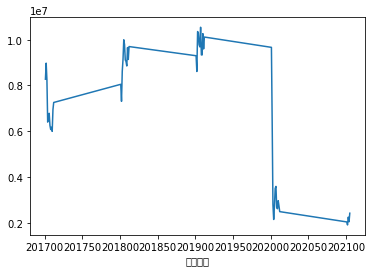

In [42]:
trans['취급액'].groupby(trans['이용년월']).mean().plot()

In [43]:
tra = df[df['업종 대분류']!='의료']

In [44]:
(tra['취급액'].groupby(tra['이용년월']).sum() / tra['이용건수'].groupby(tra['이용년월']).sum())

이용년월
201701    129247.281925
201702    136240.600160
201703    115082.818841
201704    109874.345771
201705    109794.853546
201706    115565.942723
201707    114294.420839
201708    127197.155300
201709    121027.142533
201710    121274.225128
201711    119533.513831
201712    123752.631171
201801    123839.356886
201802    118685.946570
201803    118662.795931
201804    123520.226223
201805    115985.648625
201806    110288.979572
201807    107761.412559
201808    110915.819336
201809    112554.883726
201810    116138.577396
201811    118725.775306
201812    125295.744383
201901    116172.865137
201902    116612.423852
201903    104354.060764
201904    111490.566648
201905    109729.418261
201906    104882.021109
201907    101995.279413
201908    106462.513288
201909    102577.774833
201910    107926.628897
201911    108847.768677
201912    111804.445331
202001    112065.880487
202002     88994.524567
202003     74257.366849
202004     68668.711930
202005     70474.358764
202006     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '201701'),
  Text(1, 0, '201702'),
  Text(2, 0, '201703'),
  Text(3, 0, '201704'),
  Text(4, 0, '201705'),
  Text(5, 0, '201706'),
  Text(6, 0, '201707'),
  Text(7, 0, '201708'),
  Text(8, 0, '201709'),
  Text(9, 0, '201710'),
  Text(10, 0, '201711'),
  Text(11, 0, '201712'),
  Text(12, 0, '201801'),
  Text(13, 0, '201802'),
  Text(14, 0, '201803'),
  Text(15, 0, '201804'),
  Text(16, 0, '201805'),
  Text(17, 0, '201806'),
  Text(18, 0, '201807'),
  Text(19, 0, '201808'),
  Text(20, 0, '201809'),
  Text(21, 0, '201810'),
  Text(22, 0, '201811'),
  Text(23, 0, '201812'),
  Text(24, 0, '201901'),
  Text(25, 0, '201902'),
  Text(26, 0, '201903'),
  Text(27, 0, '201904'),
  Text(28, 0, '201905'),
  Text(29, 0, '201906'),
  Text(30, 0, 

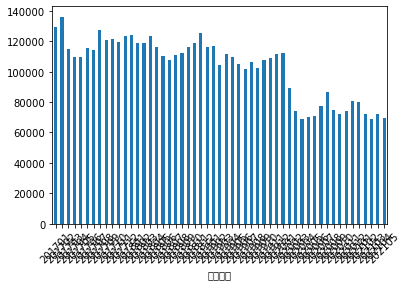

In [45]:
(tra['취급액'].groupby(tra['이용년월']).sum() / tra['이용건수'].groupby(tra['이용년월']).sum()).plot(kind='bar')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='이용년월'>

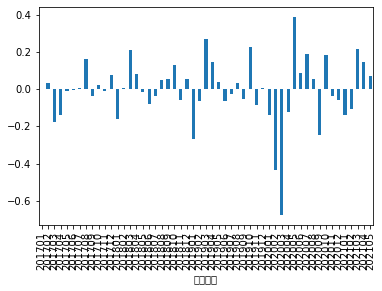

In [46]:
data = pd.DataFrame(tra['취급액'].groupby(tra['이용년월']).sum())
data['change'] = data.pct_change().fillna(0)
data['change'].plot(kind='bar')

In [47]:
data1 = pd.DataFrame(tra['취급액'].groupby(tra['년']).sum())
data1['change'] = data1.pct_change().fillna(0)
data1

,취급액,change
년,,
2017,6835046306576,0.000000
2018,7560439686212,0.106129
2019,8126727230313,0.074901
2020,2549731864262,-0.686254
2021,753022293916,-0.704666


<AxesSubplot:xlabel='년'>

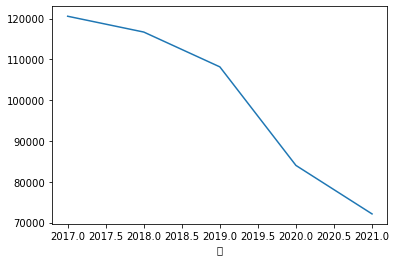

In [48]:
(tra['취급액'].groupby(tra['년']).sum()/tra['이용건수'].groupby(tra['년']).sum()).plot()

<AxesSubplot:xlabel='이용년월'>

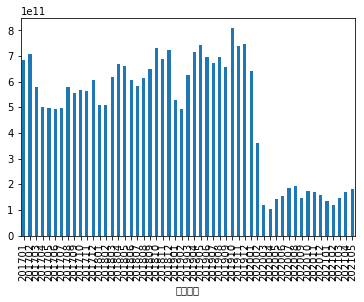

In [49]:
tra['취급액'].groupby(tra['이용년월']).sum().plot(kind='bar')

In [50]:
tra['이용건수'].groupby(tra['이용년월']).sum()

이용년월
201701    5293623
201702    5196004
201703    5051171
201704    4560904
201705    4529642
201706    4279251
201707    4353475
201708    4543344
201709    4588178
201710    4680978
201711    4713579
201712    4903102
201801    4101035
201802    4305306
201803    5209589
201804    5418652
201805    5687964
201806    5503714
201807    5420996
201808    5531687
201809    5756635
201810    6293793
201811    5785486
201812    5777295
201901    4550373
201902    4232089
201903    5993415
201904    6427710
201905    6773287
201906    6624218
201907    6617231
201908    6540727
201909    6415154
201910    7484259
201911    6804492
201912    6679532
202001    5720673
202002    4055841
202003    1581604
202004    1502458
202005    2031518
202006    2200777
202007    2390116
202008    2257054
202009    1974065
202010    2409316
202011    2265187
202012    1966338
202101    1690480
202102    1674209
202103    2131500
202104    2345015
202105    2601171
Name: 이용건수, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '201701'),
  Text(1, 0, '201702'),
  Text(2, 0, '201703'),
  Text(3, 0, '201704'),
  Text(4, 0, '201705'),
  Text(5, 0, '201706'),
  Text(6, 0, '201707'),
  Text(7, 0, '201708'),
  Text(8, 0, '201709'),
  Text(9, 0, '201710'),
  Text(10, 0, '201711'),
  Text(11, 0, '201712'),
  Text(12, 0, '201801'),
  Text(13, 0, '201802'),
  Text(14, 0, '201803'),
  Text(15, 0, '201804'),
  Text(16, 0, '201805'),
  Text(17, 0, '201806'),
  Text(18, 0, '201807'),
  Text(19, 0, '201808'),
  Text(20, 0, '201809'),
  Text(21, 0, '201810'),
  Text(22, 0, '201811'),
  Text(23, 0, '201812'),
  Text(24, 0, '201901'),
  Text(25, 0, '201902'),
  Text(26, 0, '201903'),
  Text(27, 0, '201904'),
  Text(28, 0, '201905'),
  Text(29, 0, '201906'),
  Text(30, 0, 

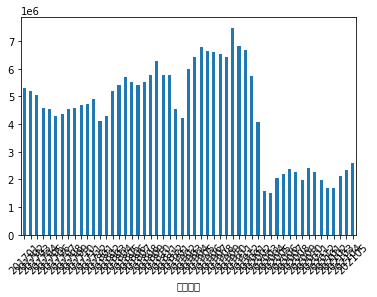

In [51]:
tra['이용건수'].groupby(tra['이용년월']).sum().plot(kind='bar')
plt.xticks(rotation=45)

In [52]:
tra['업종 소분류'].unique()

array(['기타지출', '스포츠센타/레포츠클럽', '피부미용', '기타', '할인점/편의점', '기타쇼핑', '한식외',
       '관광여행사', '의류잡화', '레저스포츠', '화장품', '테니스장', '수중장비', '그외숙박', '보트판매',
       '유흥', '관광상품', '수영장', '종합레저타운/놀이동산', '음료제과', '수련원,체험장', '스키장',
       '가전전자제품', '실외골프장', '1급2급호텔', '실내골프장', '동물농장', '특급호텔', '이용,미용',
       '수족관', '볼링장', '목욕시설', '공연장,극장', '쇼핑몰', '오락시설', '면세점', '백화점', '한식',
       '운동경기관람', '당구장', '자전거(성인용)'], dtype=object)

In [53]:
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '교통'),
  Text(1, 0, '쇼핑'),
  Text(2, 0, '숙박'),
  Text(3, 0, '스포츠'),
  Text(4, 0, '음식'),
  Text(5, 0, '체험')])

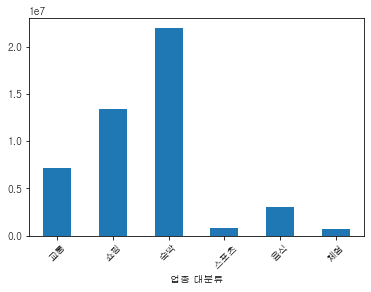

In [54]:
import matplotlib.pyplot as plt
tra['취급액'].groupby(tra['업종 대분류']).mean().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '교통'),
  Text(1, 0, '쇼핑'),
  Text(2, 0, '숙박'),
  Text(3, 0, '스포츠'),
  Text(4, 0, '음식'),
  Text(5, 0, '체험')])

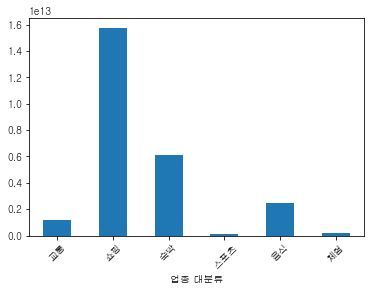

In [55]:
tra['취급액'].groupby(tra['업종 대분류']).sum().plot(kind='bar')
plt.xticks(rotation=45)

# native

In [162]:
import pandas as pd
native = pd.read_csv('./data/NATIVE.txt',sep="|")
native

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30.0,201701,RED,활동,351296766,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50.0,201701,RED,휴식,72244196,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30.0,201701,WHITE,휴식,532911085,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50.0,201701,WHITE,활동,50972534,951
4,충남,세종,.,취미오락,종합쇼핑,M,40.0,201701,RED,휴식,19104457,408
...,...,...,...,...,...,...,...,...,...,...,...,...
52729599,부산,부산,해운대구,스포츠활동,골프,M,40.0,202009,WHITE,휴식,3105000,101
52729600,전북,부산,해운대구,여행,숙박,M,50.0,202008,RED,활동,104000,2
52729601,경기,부산,해운대구,취미오락,인터넷게임,F,40.0,202008,WHITE,활동,6000,2
52729602,서울,부산,해운대구,스포츠활동,스포츠용품구매,M,40.0,202103,RED,활동,327000,5


In [163]:
native.columns = ['거주지', '가맹점 주소(시도)', '가맹점 주소(시군구)', '업종 대분류', '업종 소분류', '성별', '연령대', '이용년월',
       '요일', '이용시간대', '취급액', '이용건수']

In [59]:
native

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수,년,월
0,세종,세종,.,취미오락,외식,M,30.0,201701,RED,활동,351296766,19010,2017,01
1,세종,세종,.,취미오락,종합쇼핑,M,50.0,201701,RED,휴식,72244196,2375,2017,01
2,세종,세종,.,취미오락,종합쇼핑,M,30.0,201701,WHITE,휴식,532911085,19979,2017,01
3,충남,세종,.,취미오락,종합쇼핑,M,50.0,201701,WHITE,활동,50972534,951,2017,01
4,충남,세종,.,취미오락,종합쇼핑,M,40.0,201701,RED,휴식,19104457,408,2017,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52729599,부산,부산,해운대구,스포츠활동,골프,M,40.0,202009,WHITE,휴식,3105000,101,2020,09
52729600,전북,부산,해운대구,여행,숙박,M,50.0,202008,RED,활동,104000,2,2020,08
52729601,경기,부산,해운대구,취미오락,인터넷게임,F,40.0,202008,WHITE,활동,6000,2,2020,08
52729602,서울,부산,해운대구,스포츠활동,스포츠용품구매,M,40.0,202103,RED,활동,327000,5,2021,03


In [165]:
native.isnull().sum()

거주지            257322
가맹점 주소(시도)      14863
가맹점 주소(시군구)     14863
업종 대분류              0
업종 소분류              0
성별                  0
연령대                20
이용년월                0
요일                  0
이용시간대               0
취급액                 0
이용건수                0
dtype: int64

In [60]:
#native['가맹점 주소'] = native['가맹점 주소(시도)']+ " " + native['가맹점 주소(시군구)']
#native['가맹점 주소'].unique()

array(['세종 .', '울산 남구', '광주 남구', '부산 남구', '대구 남구', '대전 동구', '대구 동구',
       '울산 동구', '부산 동구', '인천 동구', '광주 동구', '부산 북구', '광주 북구', '울산 북구',
       '대구 북구', '대전 서구', '광주 서구', '인천 서구', '부산 서구', '대구 서구', '서울 중구',
       '인천 중구', '대구 중구', '대전 중구', '울산 중구', '부산 중구', '경기 가평군', '서울 강남구',
       '서울 강동구', '강원 강릉시', '서울 강북구', '서울 강서구', '부산 강서구', '전남 강진군',
       '인천 강화군', '경남 거제시', '경남 거창군', '경북 경산시', '경북 경주시', '충남 계룡시',
       '인천 계양구', '경북 고령군', '경남 고성군', '강원 고성군', '경기 고양시', '전북 고창군',
       '전남 고흥군', '전남 곡성군', '충남 공주시', '경기 과천시', '서울 관악구', '경기 광명시',
       '광주 광산구', '전남 광양시', '경기 광주시', '서울 광진구', '충북 괴산군', '전남 구례군',
       '서울 구로구', '경기 구리시', '경북 구미시', '전북 군산시', '경북 군위군', '경기 군포시',
       '충남 금산군', '부산 금정구', '서울 금천구', '부산 기장군', '전북 김제시', '경북 김천시',
       '경기 김포시', '경남 김해시', '전남 나주시', '인천 남동구', '전북 남원시', '경남 남해군',
       '서울 노원구', '충남 논산시', '충북 단양군', '대구 달서구', '대구 달성군', '전남 담양군',
       '충남 당진시', '대전 대덕구', '서울 도봉구', '부산 동래구', '서울 동작구', '강원 동해시',
       '서울 마포구', '전남 목포시', '전남 무안군', '전북 무주군', '경

In [61]:
native['가맹점 주소(시군구)'].unique()

array(['.', '남구', '동구', '북구', '서구', '중구', '가평군', '강남구', '강동구', '강릉시',
       '강북구', '강서구', '강진군', '강화군', '거제시', '거창군', '경산시', '경주시', '계룡시',
       '계양구', '고령군', '고성군', '고양시', '고창군', '고흥군', '곡성군', '공주시', '과천시',
       '관악구', '광명시', '광산구', '광양시', '광주시', '광진구', '괴산군', '구례군', '구로구',
       '구리시', '구미시', '군산시', '군위군', '군포시', '금산군', '금정구', '금천구', '기장군',
       '김제시', '김천시', '김포시', '김해시', '나주시', '남동구', '남원시', '남해군', '노원구',
       '논산시', '단양군', '달서구', '달성군', '담양군', '당진시', '대덕구', '도봉구', '동래구',
       '동작구', '동해시', '마포구', '목포시', '무안군', '무주군', '문경시', '밀양시', '보령시',
       '보성군', '보은군', '봉화군', '부안군', '부여군', '부천시', '부평구', '사상구', '사천시',
       '사하구', '산청군', '삼척시', '상주시', '서산시', '서천군', '서초구', '성남시', '성동구',
       '성북구', '성주군', '속초시', '송파구', '수성구', '수영구', '수원시', '순창군', '순천시',
       '시흥시', '아산시', '안동시', '안산시', '안성시', '안양시', '양구군', '양산시', '양양군',
       '양주시', '양천구', '양평군', '여수시', '여주시', '연수구', '연제구', '연천군', '영광군',
       '영덕군', '영도구', '영동군', '영암군', '영월군', '영주시', '영천시', '예산군', '오산시',
       '옥천군', '옹진군',

In [166]:
native[native['거주지'].isnull()]

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수
42586565,NaN,세종,.,취미오락,패션쇼핑,F,20.0,202012,RED,활동,89640,1
42586626,NaN,울산,남구,취미오락,종합쇼핑,F,60.0,202105,RED,활동,282690,8
42586672,NaN,울산,남구,취미오락,종합쇼핑,M,40.0,202103,WHITE,휴식,421850,17
42586756,NaN,대구,남구,스포츠활동,골프,M,60.0,202101,WHITE,활동,30000,1
42586780,NaN,부산,남구,취미오락,종합쇼핑,M,40.0,202007,RED,활동,184960,6
...,...,...,...,...,...,...,...,...,...,...,...,...
52729378,NaN,경기,남양주시,스포츠활동,자전거,F,40.0,202105,WHITE,활동,34000,2
52729384,NaN,경기,남양주시,취미오락,종합쇼핑,F,40.0,202105,RED,활동,5999210,32
52729400,NaN,서울,동대문구,취미오락,외식,F,50.0,202101,WHITE,휴식,58300,5
52729493,NaN,제주,서귀포시,취미오락,외식,M,60.0,202101,RED,활동,84000,3


In [167]:
native[native['가맹점 주소(시도)'].isnull()]

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수
42586464,경기,NaN,NaN,취미오락,외식,M,40.0,202011,WHITE,활동,3923300,451
42586465,경남,NaN,NaN,취미오락,외식,F,50.0,202009,WHITE,휴식,35200,4
42586466,경기,NaN,NaN,취미오락,외식,M,20.0,202007,RED,활동,857800,134
42586467,경남,NaN,NaN,취미오락,외식,M,50.0,202010,WHITE,활동,302500,34
42586468,인천,NaN,NaN,취미오락,종합쇼핑,M,40.0,202009,WHITE,활동,51541110,783
...,...,...,...,...,...,...,...,...,...,...,...,...
52723209,세종,NaN,NaN,취미오락,미용,M,50.0,202009,WHITE,활동,226000,4
52723210,인천,NaN,NaN,여행,숙박,M,20.0,202103,WHITE,휴식,105000,3
52726764,NaN,NaN,NaN,스포츠활동,골프,F,40.0,202007,WHITE,활동,140000,1
52726765,충북,NaN,NaN,취미오락,유흥,F,30.0,202010,WHITE,휴식,202000,6


### 

In [168]:
native.loc[native['가맹점 주소(시군구)']=='.','가맹점 주소(시군구)']='세종'

In [64]:
# 남은거 확인완료
native[native['가맹점 주소(시군구)']=='.']

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수,년,월,가맹점 주소


<AxesSubplot:xlabel='이용년월'>

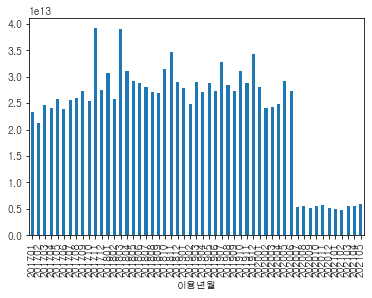

In [65]:
(native['취급액'].groupby(native['이용년월']).sum()).plot(kind='bar')

In [169]:
from datetime import datetime as dt

native['이용년월'] = pd.to_datetime(native['이용년월'], format='%Y%m')

<AxesSubplot:xlabel='이용년월'>

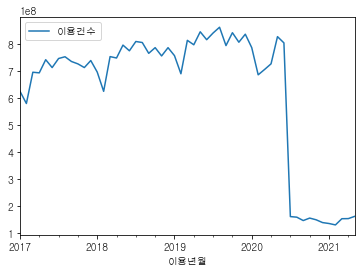

In [173]:
num = pd.DataFrame(native['이용건수'].groupby(native['이용년월']).sum())
num.plot()

* 전반적인 이용건수가 확연히 감소했음을 파악할 수 있었다.

In [174]:
native

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수
0,세종,세종,세종,취미오락,외식,M,30.0,2017-01-01,RED,활동,351296766,19010
1,세종,세종,세종,취미오락,종합쇼핑,M,50.0,2017-01-01,RED,휴식,72244196,2375
2,세종,세종,세종,취미오락,종합쇼핑,M,30.0,2017-01-01,WHITE,휴식,532911085,19979
3,충남,세종,세종,취미오락,종합쇼핑,M,50.0,2017-01-01,WHITE,활동,50972534,951
4,충남,세종,세종,취미오락,종합쇼핑,M,40.0,2017-01-01,RED,휴식,19104457,408
...,...,...,...,...,...,...,...,...,...,...,...,...
52729599,부산,부산,해운대구,스포츠활동,골프,M,40.0,2020-09-01,WHITE,휴식,3105000,101
52729600,전북,부산,해운대구,여행,숙박,M,50.0,2020-08-01,RED,활동,104000,2
52729601,경기,부산,해운대구,취미오락,인터넷게임,F,40.0,2020-08-01,WHITE,활동,6000,2
52729602,서울,부산,해운대구,스포츠활동,스포츠용품구매,M,40.0,2021-03-01,RED,활동,327000,5


In [175]:
df = native[native['이용년월']>='2019']

In [176]:
df1 = df[df['이용년월']<'2020']

In [186]:
df2 = df[(df['이용년월']>='2020') & (df['이용년월']<'2021')].sort_values(by='이용년월')

In [220]:
df1.to_csv('2019년.csv')

In [221]:
df2.to_csv('2020년.csv')

OSError: [Errno 28] No space left on device

In [216]:
df2

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수
37019476,경기,세종,세종,취미오락,유흥,M,40.0,2020-01-01,RED,휴식,6410700,45
37696404,서울,전북,군산시,취미오락,독서,F,30.0,2020-01-01,RED,휴식,581400,10
37696405,세종,전북,군산시,여행,숙박,M,50.0,2020-01-01,WHITE,휴식,459000,10
37696406,전남,전북,군산시,여행,숙박,F,40.0,2020-01-01,WHITE,휴식,408000,10
37696407,경남,전북,군산시,문화예술활동,공연관람,M,50.0,2020-01-01,RED,활동,119850,20
...,...,...,...,...,...,...,...,...,...,...,...,...
49763093,경기,경북,안동시,취미오락,교육훈련,F,30.0,2020-12-01,WHITE,활동,682000,1
47406113,전북,경기,수원시,취미오락,패션쇼핑,F,20.0,2020-12-01,RED,휴식,26300,1
45563822,강원,경기,파주시,취미오락,종합쇼핑,F,50.0,2020-12-01,RED,활동,586650,8
42817957,경북,부산,북구,여행,숙박,M,30.0,2020-12-01,WHITE,활동,110000,2


In [182]:
df3 = df.loc[df['이용년월']>='2021',:].sort_values(by='이용년월')

,거주지,가맹점 주소(시도),가맹점 주소(시군구),업종 대분류,업종 소분류,성별,연령대,이용년월,요일,이용시간대,취급액,이용건수
52729603,충북,부산,해운대구,취미오락,패션쇼핑,F,50.0,2021-01-01,WHITE,휴식,6100,1
44900696,충북,서울,송파구,취미오락,애완동물돌보기,M,50.0,2021-01-01,WHITE,활동,4000,1
44900699,전남,서울,송파구,스포츠활동,골프,F,30.0,2021-01-01,RED,활동,42000,1
44900702,강원,서울,송파구,스포츠활동,레저스포츠,M,60.0,2021-01-01,WHITE,활동,3500,1
44900706,충북,대구,수성구,취미오락,인터넷게임,F,60.0,2021-01-01,WHITE,휴식,28300,4
...,...,...,...,...,...,...,...,...,...,...,...,...
46436509,충남,전북,정읍시,취미오락,종합쇼핑,F,40.0,2021-05-01,RED,활동,260870,4
46436516,충남,제주,제주시,여행,관광쇼핑,M,20.0,2021-05-01,RED,휴식,1293620,20
46436546,전남,제주,제주시,스포츠활동,레저스포츠,M,40.0,2021-05-01,RED,휴식,12000,1
46436551,강원,충북,제천시,취미오락,미용,M,40.0,2021-05-01,WHITE,활동,1112800,29


In [188]:
a=(df1['이용건수'].groupby(df1['업종 대분류']).sum())
b=(df2['이용건수'].groupby(df2['업종 대분류']).sum())

pd.concat([a,b], axis=1)

,이용건수,이용건수
업종 대분류,,
문화예술활동,101578680,26227221
스포츠활동,155202372,79893662
여행,286110945,107396408
취미오락,9159092381,5231946848


<Figure size 864x360 with 0 Axes>

In [194]:
a=(df1['이용건수'].groupby(df1['업종 소분류']).sum())
b=(df2['이용건수'].groupby(df2['업종 소분류']).sum())

covid = pd.concat([a,b], axis=1)
covid.columns=['2019','2020']

<Figure size 864x360 with 0 Axes>

In [199]:
covid['change'] = (covid['2020'] - covid['2019']) / covid['2019'] * 100

In [202]:
covid.sort_values(by='change').head()

,2019,2020,change
업종 소분류,,,
공연관람,90388623,21428391,-76.293044
관광쇼핑,20583406,5179472,-74.836662
여행사,2842749,755293,-73.430894
교통,194212412,71924232,-62.966202
체험,17211400,6395172,-62.843394


In [204]:
a=(df1['취급액'].groupby(df1['업종 소분류']).sum())
b=(df2['취급액'].groupby(df2['업종 소분류']).sum())

covid1 = pd.concat([a,b], axis=1)
covid1.columns=['2019','2020']
covid1['change'] = (covid1['2020'] - covid1['2019']) / covid1['2019'] * 100

covid1.sort_values(by='change')

,2019,2020,change
업종 소분류,,,
여행사,1530288804665,203915888654,-86.674679
관광쇼핑,1891775556853,406882058054,-78.492054
공연관람,1518678144565,366264330417,-75.882689
교통,8543652839683,2539660942807,-70.274296
체험,430390465293,145534248703,-66.185531
운동경기관람,568910714,205174273,-63.935593
목욕,700483805610,275001696762,-60.741177
유흥,4626250545855,1917153302140,-58.559242
레저스포츠,1267737760445,534137062416,-57.866912


## 문화교류가 잘되기 위한 조건 -> 교통???

## 지역자료로 

<AxesSubplot:ylabel='업종 소분류'>

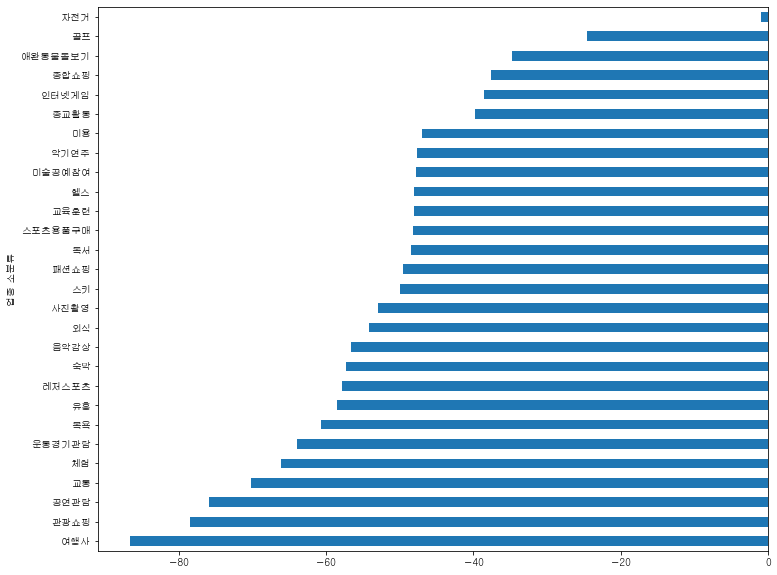

In [215]:
plt.figure(figsize=(12, 10))
covid1['change'].sort_values().plot(kind='barh')

In [ ]:
pivot(df, '','')

In [91]:
per_spend = (native['취급액'].groupby(native['이용년월']).sum()) / (native['이용건수'].groupby(native['이용년월']).sum())

<AxesSubplot:xlabel='이용년월'>

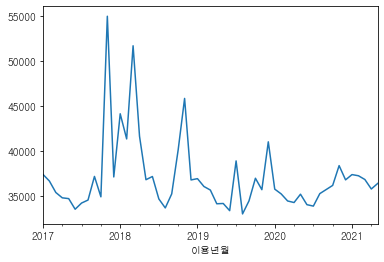

In [92]:
per_spend.plot()

<AxesSubplot:xlabel='가맹점 주소(시도)'>

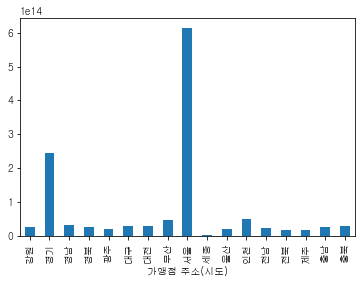

In [93]:
native['취급액'].groupby(native['가맹점 주소(시도)']).sum().plot(kind='bar')

<AxesSubplot:xlabel='가맹점 주소(시도)'>

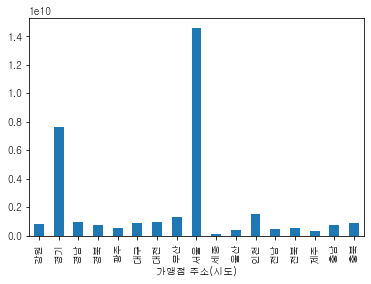

In [94]:
(native['이용건수'].groupby(native['가맹점 주소(시도)']).sum()).plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '강원'),
  Text(1, 0, '경기'),
  Text(2, 0, '경남'),
  Text(3, 0, '경북'),
  Text(4, 0, '광주'),
  Text(5, 0, '대구'),
  Text(6, 0, '대전'),
  Text(7, 0, '부산'),
  Text(8, 0, '서울'),
  Text(9, 0, '세종'),
  Text(10, 0, '울산'),
  Text(11, 0, '인천'),
  Text(12, 0, '전남'),
  Text(13, 0, '전북'),
  Text(14, 0, '제주'),
  Text(15, 0, '충남'),
  Text(16, 0, '충북')])

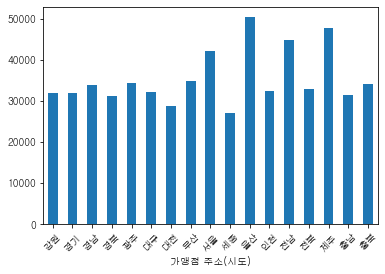

In [95]:
((native['취급액'].groupby(native['가맹점 주소(시도)']).sum())/(native['이용건수'].groupby(native['가맹점 주소(시도)']).sum())).plot(kind='bar')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '강원'),
  Text(1, 0, '경기'),
  Text(2, 0, '경남'),
  Text(3, 0, '경북'),
  Text(4, 0, '광주'),
  Text(5, 0, '대구'),
  Text(6, 0, '대전'),
  Text(7, 0, '부산'),
  Text(8, 0, '서울'),
  Text(9, 0, '세종'),
  Text(10, 0, '울산'),
  Text(11, 0, '인천'),
  Text(12, 0, '전남'),
  Text(13, 0, '전북'),
  Text(14, 0, '제주'),
  Text(15, 0, '충남'),
  Text(16, 0, '충북')])

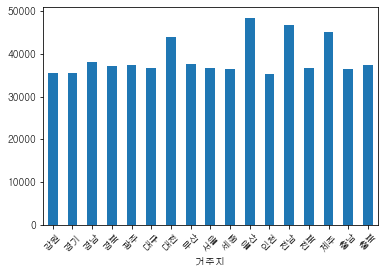

In [96]:
((native['취급액'].groupby(native['거주지']).sum())/(native['이용건수'].groupby(native['거주지']).sum())).plot(kind='bar')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='업종 소분류'>

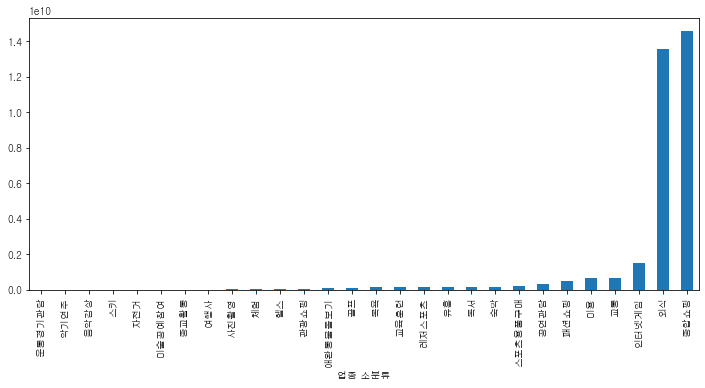

In [97]:
plt.figure(figsize=(12, 5))

(native['이용건수'].groupby(native['업종 소분류']).sum()).sort_values().plot(kind='bar')

<AxesSubplot:xlabel='업종 소분류'>

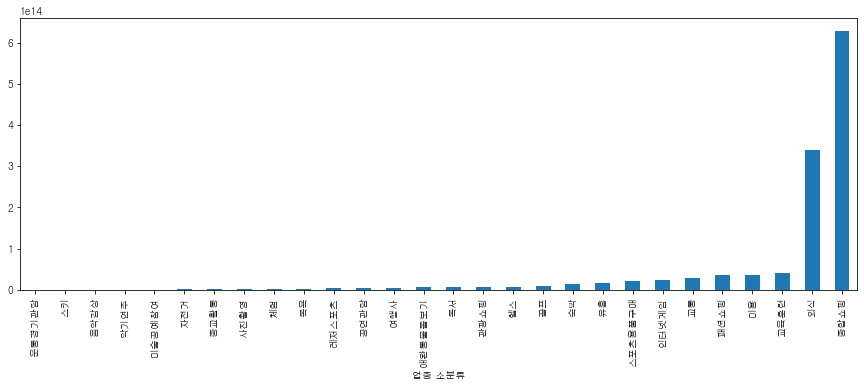

In [98]:
plt.figure(figsize=(15, 5))
native['취급액'].groupby(native['업종 소분류']).sum().sort_values().plot(kind='bar')

(array([0, 1, 2, 3]),
 [Text(0, 0, '문화예술활동'),
  Text(1, 0, '스포츠활동'),
  Text(2, 0, '여행'),
  Text(3, 0, '취미오락')])

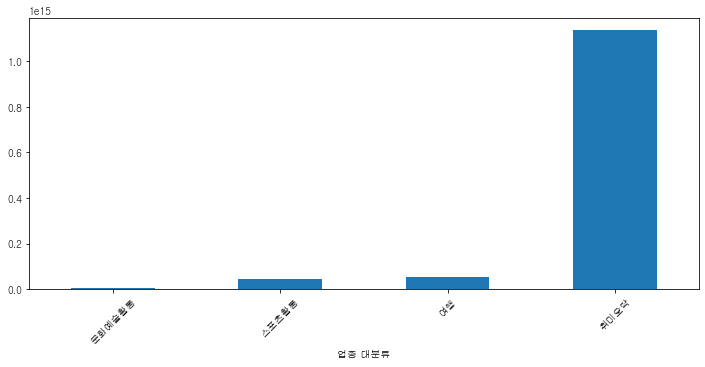

In [99]:
plt.figure(figsize=(12, 5))

(native['취급액'].groupby(native['업종 대분류']).sum()).plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '20.0'),
  Text(1, 0, '30.0'),
  Text(2, 0, '40.0'),
  Text(3, 0, '50.0'),
  Text(4, 0, '60.0')])

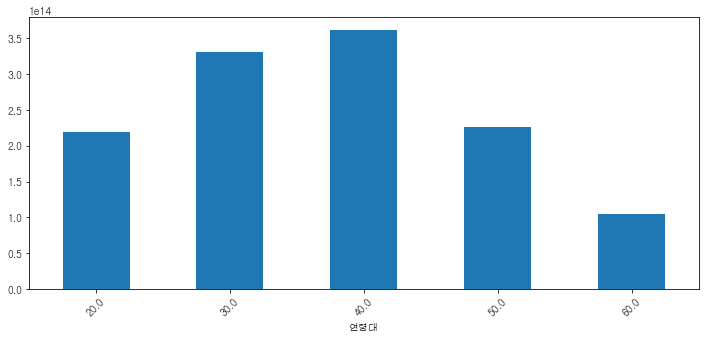

In [100]:
plt.figure(figsize=(12, 5))

(native['취급액'].groupby(native['연령대']).sum()).plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '20.0'),
  Text(1, 0, '30.0'),
  Text(2, 0, '40.0'),
  Text(3, 0, '50.0'),
  Text(4, 0, '60.0')])

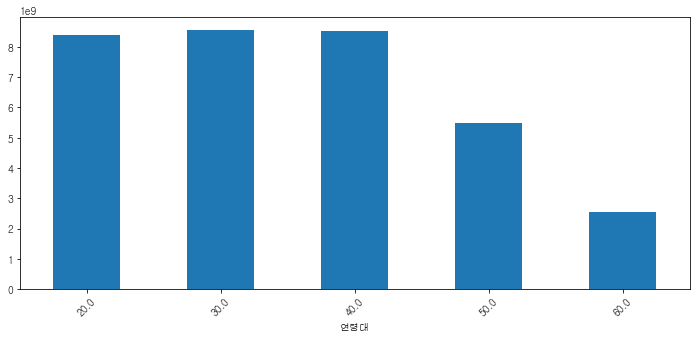

In [101]:
plt.figure(figsize=(12, 5))

(native['이용건수'].groupby(native['연령대']).sum()).plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'RED'), Text(1, 0, 'WHITE')])

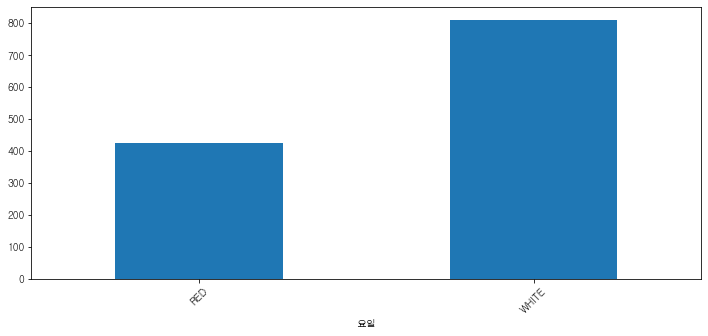

In [102]:
plt.figure(figsize=(12, 5))

(native['이용건수'].groupby(native['요일']).mean()).plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'RED'), Text(1, 0, 'WHITE')])

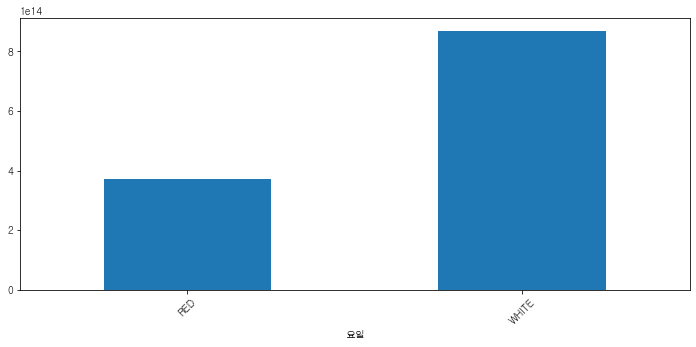

In [103]:
plt.figure(figsize=(12, 5))

(native['취급액'].groupby(native['요일']).sum()).plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'RED'), Text(1, 0, 'WHITE')])

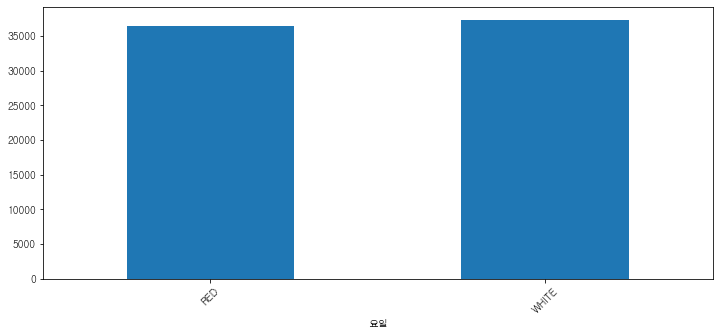

In [104]:
plt.figure(figsize=(12, 5))

(native['취급액'].groupby(native['요일']).sum()/native['이용건수'].groupby(native['요일']).sum()).plot(kind='bar')
plt.xticks(rotation=45)

In [105]:
native['취급액'].groupby(native['요일']).sum()/native['이용건수'].groupby(native['요일']).sum()

요일
RED      36522.578713
WHITE    37339.363414
dtype: float64

In [ ]:
# 시계열 자료니까 시계열 자료를 받아서 시계열 예측해보는 것도 괜찮을 것 같다